# Analysis of beatmaps in Rhythm Games: a case study with "osu!"

**Abstract**. We propose to analyze beatmaps (maps that are usually text-based and are designed by human users to represent songs) and use our own function to classify/detect different mapping styles. We measure the evolution of average difficulty in each class over time to infer trends. Next, we propose a way of using Machine Learning to _create new beatmaps in each class without human intervention_.

## Introduction
Rhythm games are a very specific type of video games which usually involve doing some repetitive action in rhythm with a music playing in the background. Popular examples of such games are _Beat Saber, Piano Tiles, Bang Dream, Guitar Hero_ to name a few. In each of these games, the community creates their own mental representation of the songs and usually put them into a text-based file which is then rendered by the game engine at real time.

We focus on a specific rhythm game called [osu!](https://osu.ppy.sh), where the gameplay consists of objects appearing on the screen which the player is supposed to hit on time with the music, and the player gets a final score depending on how accurately they hit the notes.

We selected _osu!_ because all their ranked beatmaps since 2007 can be downloaded online [via this link](https://drive.google.com/drive/folders/13VvNppE_QvqFXOKhXG2hvewZU9PojpRh), and since I'm familiar with the gameplay.

## Data Organization
Here's how the data is organized:
+ Each folder contains all archives (effectively .zip files) of ranked beatmaps
+ Each archive contains a music file, several beatmap files, and other stuff (pictures and such).
+ Each beatmap file contains information about the music, followed by information on what object appears at what time. For example, the following code represents a _hitcircle_ object at time 80479ms appearing at position (170px,146px), followed by another object appearing at (200px,138px) at time 80570ms, followed by another _slider_ object starting at (233px,130px) at time 80661ms, and with beizer-type anchors at (294,126),(294,126),(341,144),(341,144),(400,139), of total duration 170ms.
```
170,146,80479,1,8,0:0:0:0:
200,138,80570,1,0,0:0:0:0:
233,130,80661,6,0,B|294:126|294:126|341:144|341:144|400:139,1,170.000003242493,14|10,0:0|0:0,0:0:0:0:
512,130,81206,1,0,0:0:0:0:
```

## Data Extraction
We first extract the .osu files from each archive by running the following in each directory:
```bash
for f in *.osz; do mv "$f" "$f.zip"; done;
for f in *.zip; do unzip -q "$f"; done;
mkdir osu/
mv *.osu ./osu
```

## Difficulty Computation
We have implemented a beatmap difficulty calculator in 2019, which is available in [this repository](https://github.com/Potla1995/POT_Bot/tree/master/POT_Bot). The difficulty measurement function is implemented in `sharpness.py`. We use this project, make some changes, and create a table of difficulty of each beatmap.

```bash
git clone https://github.com/Potla1995/POT_BOT
cd POT_BOT/POT_Bot/
# Uncomment the last few lines in sharpness.py
# Modify sharpness.py to iterate over all the extracted .osu files
python3 sharpness.py
```

The table obtained is then made into a dictionary, and copied over into this notebook.

In [1]:
from dictionary_data import *
print(len(jan_2019_diff))
print(len(feb_2019_diff))
print(len(mar_2019_diff))

21
21
21
[2.0471209158611705, 4.112124100757871, 3.1133676690614633, 2.082104488924114, 2.2576191898905833, 2.6387937597020366, 2.331501074986375, 5.061243174016914, 3.432087635141496, 2.0983228588001177, 2.254441946268222, 2.274118575159883, 4.806021267075159, 2.106356881344403, 2.0310986535867372, 2.2739915727335145, 2.4785376489064457, 2.006995235002308, 2.003470345364621, 2.4679167081983517, 3.548181793365983, 2.423070352131367]
[2.3151316378601057, 2.7512434378460844, 2.4177741094836773, 2.264852709893654, 2.3865183433922703, 4.3888839676379625, 2.335975015403818, 2.3103253598074387, 2.634928467978433, 3.293722277876503, 2.2512485626611674, 2.5758011789849258, 3.704161410483924, 3.531324945380214, 2.0751294715091277, 2.077858733697044, 2.282508773360554, 2.139537930707267, 2.044987256534506, 2.0214353744099496, 2.1985636568532665, 2.111706233618518, 2.6000098459035397]
[2.1856161759493324, 2.3359693775155925, 2.285607531670973, 2.1155972052701673, 2.1710455079765927, 2.01260609152

Let us now only look at maps which have a difficulty value at least 2.

In [2]:
print(len(jan_2019_hard))
print(len(feb_2019_hard))
print(len(mar_2019_hard))
# For some reason importing the other three variables was not working and I'm running out of time...
# So here are the other three lists, manually:
apr_2019_hard = [2.0471209158611705, 4.112124100757871, 3.1133676690614633, 2.082104488924114, 2.2576191898905833, 2.6387937597020366, 2.331501074986375, 5.061243174016914, 3.432087635141496, 2.0983228588001177, 2.254441946268222, 2.274118575159883, 4.806021267075159, 2.106356881344403, 2.0310986535867372, 2.2739915727335145, 2.4785376489064457, 2.006995235002308, 2.003470345364621, 2.4679167081983517, 3.548181793365983, 2.423070352131367]
may_2019_hard = [2.3151316378601057, 2.7512434378460844, 2.4177741094836773, 2.264852709893654, 2.3865183433922703, 4.3888839676379625, 2.335975015403818, 2.3103253598074387, 2.634928467978433, 3.293722277876503, 2.2512485626611674, 2.5758011789849258, 3.704161410483924, 3.531324945380214, 2.0751294715091277, 2.077858733697044, 2.282508773360554, 2.139537930707267, 2.044987256534506, 2.0214353744099496, 2.1985636568532665, 2.111706233618518, 2.6000098459035397]
jun_2019_hard = [2.1856161759493324, 2.3359693775155925, 2.285607531670973, 2.1155972052701673, 2.1710455079765927, 2.0126060915282746, 3.4417659362429447, 3.0559944272029735, 2.6160120560486475, 3.7789681006444713, 4.1439290118880034, 2.579385956252626, 3.041611289312401, 3.0546594975846553, 2.026800700221406, 2.1896658275140286, 2.6839303463104076]
print(len(apr_2019_hard))
print(len(may_2019_hard))
print(len(jun_2019_hard))

months_2019_hard = [jan_2019_hard, feb_2019_hard, mar_2019_hard, apr_2019_hard, may_2019_hard, jun_2019_hard]

21
21
21
22
23
17


In [3]:
# We now have the difficulty values for hard maps for the first six months of 2019.
# Let's see their means:
import numpy as np
for i in months_2019_hard:
    print(np.mean(i))

2.472765331535712
2.413782029053611
2.6505877183467894
2.7203857202854156
2.552766465273215
2.6893626493607936


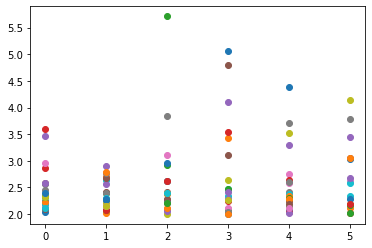

In [4]:
# While it's not obvious from this small dataset, there is a gradual increase in difficulty.
# Let's do a scatterplot
from matplotlib import pyplot as plt
%matplotlib inline

for i in range(6):
    for j in months_2019_hard[i]:
        plt.scatter(i,j)
plt.show()

In order to be more precise with the scatter, we can determine the exact dates on which the beatmaps were made available.

We wanted to prove that the difficulty distribution is non-uniform, and increases with time. We can see whether this is true using a chi squared test.

In [13]:
plt.close()
import scipy.stats
print(scipy.stats.chisquare([np.mean(months_2019_hard[i]) for i in range(6)]))

Power_divergenceResult(statistic=0.029596526175394548, pvalue=0.9999920683738542)


Whoops, clearly this is not enough data to be able to deduce anything of substance. So we search around for more data, and it seems there's a **2020_05_17_osu_files.tar.bz2** available in [this link](https://data.ppy.sh/). However, it's just 425MB of text when archived, and does not contain date information.

But, newer beatmaps have larger file names (as a number). Hence we haven't lost all hope yet. We first run the difficulty evaluation script on all these files (57090 of them), get the output and plot the difficulty against the map ID.

The output of the difficulty calculation script is stored in `sharpness_calc.out`, and its values are then plotted.

59428
233


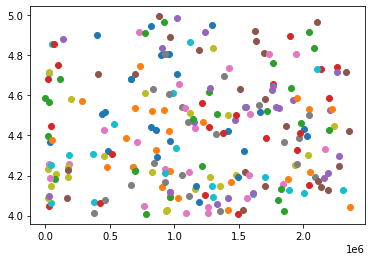

In [27]:
f = open('sharpness_calc.out','r')
difficulties = f.read()
difficulties = difficulties.split('\n')
difficulties = [i.split(':') for i in difficulties]
difficulties = difficulties[:-1] # ignore last entry which is empty...
print(len(difficulties))
hard_maps = [i for i in difficulties if 5.0 >= float(i[1]) >= 4.0]
print(len(hard_maps))
for i in hard_maps:
    plt.scatter(int(i[0]),float(i[1]))
plt.show()

As such, this picture doesn't make much sense. But if we fit a line to this and see that it has a positive slope, it would be some indication of the average difficulty. Let's do this once on this smaller data, and once on the entire dataset.

In [29]:
from sklearn.linear_model import LinearRegression
x = np.array([int(i[0]) for i in hard_maps]).reshape((-1,1))
y = np.array([float(i[1]) for i in hard_maps])
#print(x)
#print(y)
model = LinearRegression().fit(x, y)
print('R^2 = ', model.score(x, y), 'Coeff = ', model.coef_)

R^2 =  0.0005574232316074568 Coeff =  [9.56697638e-09]


In [31]:
x = np.array([int(i[0]) for i in difficulties]).reshape((-1,1))
y = np.array([float(i[1]) for i in difficulties])
model = LinearRegression().fit(x,y)
print('R^2 = ', model.score(x,y), 'Coeff = ', model.coef_)

R^2 =  3.7421323261344064e-05 Coeff =  [0.00012051]


The reason 

Let's move over to the concluding section.

## Goal of this project
The ultimate goal of this project is twofold, the second being the more interesting.
### 1. Predict map difficulty in the future.
There is a lot of data available to us, and there is a generic trend that beatmaps get harder with time as players get more and more accustomed to the game. We would like to fit a curve onto the growth rate of the difficulty of submitted beatmaps to prove this hypothesis, and predict where the difficulty level would be in the future.

There are also different ways of measuring difficulties, including the official way, which is quite complex and is ever-evolving!
### 2. Use learning to creat machine-generated beatmaps.
The problem with the current game model is that there are too many songs, and too few users who can represent the music properly. The goal of this project would be to analyze how beatmaps of a particular difficulty range are made, and learn the characteristics. Then together with the audio file for guidelines, to generate a beatmap.

## Complexity
This is actually pretty complex. For now we have thrown audio analysis out of the window, and are only hoping to learn things from the text-based beatmap files. This is fine for the first goal, but in order to actually create beatmaps one would also have to look at the audio signatures.

In conclusion, if this project can be done, it would be immensely helpful to video game companies that rely on their userbase or staff to create beatmaps representing songs.